# Sistem Rekomendasi Postingan dengan Pendekatan *Content-Based Filtering* dan *Collaborative Filtering*

---

Disusun untuk memenuhi proyek akhir dari kelas [*Machine Learning* Terapan](https://www.dicoding.com/academies/319) Dicoding.

**Oleh: [Muhammad Alfayed Dennita](https://www.dicoding.com/users/alfayed)**


## Pendahuluan

Suatu situs web yang baru saja rilis beberapa bulan menerima laporan bahwa jumlah tayangan postingan di situs web mereka mengalami penurunan yang cukup drastis. Pengguna mereka banyak beralih ke situs web kompetitor yang baru saja rilis beberapa hari. Hal ini tentu menimbulkan pertanyaan, mengapa sebagian pengguna bisa beralih ke situs web yang masih baru tersebut? Apakah situs web tersebut memiliki tampilan yang lebih menarik atau kualitas postingan yang lebih baik?

Setelah dilakukan pemeriksaan, ternyata penyebab utama dari penurunan jumlah tayangan postingan adalah kurangnya rasa nyaman dan buruknya pengalaman pengguna dalam menjelajahi situs web. Jika dilihat dari interaksi pengguna dengan situs web, pengguna lebih banyak mencari postingan yang ingin dilihatnya melalui kotak pencarian dibandingkan membuka postingan melalui beranda mereka. Hal tersebut menandakan bahwa menampilkan postingan acak di beranda bukanlah ide yang baik, tentunya pengguna menginginkan postingan yang sesuai dengan preferensi dan minatnya.

Oleh karena itu, pengembang situs web tersebut harus membuat sebuah fitur atau sistem baru untuk situs web mereka yang dapat memberikan daftar rekomendasi postingan yang diminati oleh penggunanya untuk ditampilkan di beranda berdasarkan histori tayangannya. Selain itu, pengembang juga dapat memberikan daftar rekomendasi postingan yang diletakkan di bawah konten postingan agar ketika pengguna telah selesai melihat suatu postingan, pengguna tersebut dapat melihat postingan lainnya yang masih relevan dengan postingan yang telah dilihatnya.

Untuk itu, pengembang akan membuat sistem rekomendasi postingan dengan metode pendekatan berbasis konten (*content-based filtering*) untuk menampilkan daftar rekomendasi postingan di bawah suatu postingan dan metode pendekatan kolaboratif (*collaborative filtering*) untuk menampilkan daftar rekomendasi postingan di beranda berdasarkan postingan yang sering dilihat pengguna.

## 1. Persiapan Lingkungan

### 1.1 Persiapan Pustaka dan Modul

1.1.1 Mengimpor pustaka [NLTK](https://www.nltk.org) dan mengunduh beberapa paket tambahannya, yaitu `stopwords` dan `wordnet`. Pustaka dan paket tersebut akan digunakan dalam proses persiapan data.

In [ ]:
import nltk
nltk.download(['stopwords', 'wordnet'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

1.1.2 Mengimpor semua pustaka dan modul yang dibutuhkan dalam semua rangkaian proses pembuatan model.

In [ ]:
# Pustaka Standar
from datetime import datetime

# Pustaka untuk Mengunggah Berkas
from google.colab import files

# Pustaka untuk Pengolahan Data
import numpy as np
import pandas as pd

# Pustaka untuk Visualisasi Data
import matplotlib.pyplot as plt

# Pustaka untuk Persiapan Data
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Pustaka untuk Pemodelan dan Evaluasi
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics.pairwise import cosine_similarity

### 1.2 Pengunduhan Data

1.2.1 Memperbarui paket [Kaggle](https://www.kaggle.com) agar dapat berfungsi dengan baik tanpa menimbulkan beberapa masalah yang mungkin akan terjadi. Jika tidak diperbarui, akan ada kemungkinan beberapa data tidak bisa diunduh.

In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 2.8 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=4153a75092e171d9b353ed9f29a89eaba19a2b1ff2189939b3b5e8c1a1b64c9f
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


1.2.2 Mengunggah berkas `kaggle.json` ke direktori aktif saat ini untuk keperluan autentikasi agar bisa terhubung dengan Kaggle API. Berkas tersebut berisi beberapa data penting yang diperlukan dalam proses autentikasi pengguna Kaggle. Untuk mendapatkannya, berkas `kaggle.json` dapat diunduh melalui pengaturan akun Kaggle bagian API.

In [ ]:
print('Unggah berkas kaggle.json:\n')
files.upload()

Unggah berkas kaggle.json:



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alfayeddennita","key":"3733aaeb91769a83236b4d0b27e7a27c"}'}

1.2.3 Membuat direktori `~/.kaggle` untuk menyimpan berkas `kaggle.json` yang telah diunggah sebelumnya. Kaggle akan melakukan proses autentikasi melalui direktori ini.

In [ ]:
! mkdir ~/.kaggle

1.2.4 Memindahkan berkas `kaggle.json` yang saat ini berada di direktori aktif ke dalam direktori `~/.kaggle` agar dapat dilakukan autentikasi oleh Kaggle ketika ada permintaan untuk mengakses Kaggle API.

In [ ]:
! mv kaggle.json ~/.kaggle

1.2.5 Mengubah hak akses berkas `kaggle.json` agar Kaggle dapat membaca dan menulis isi berkas tersebut untuk keperluan autentikasi.

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

1.2.6 Mengecek apakah *notebook* sudah dapat terhubung ke Kaggle API dengan menampilkan beberapa data acak yang dapat diunduh.

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-10 17:55:57          13855       1123  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8330        631  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3709        263  1.0              
fatiimaezzahra/famous-iconic-women                          Famous Iconic Women           

Berdasarkan keluaran tersebut, *notebook* sudah berhasil terhubung dengan Kaggle API sehingga sudah siap untuk melakukan pengunduhan data yang dibutuhkan.

1.2.7 Mengunduh data **Post recommender** yang diterbitkan oleh pengguna Kaggle dengan nama pengguna [rohit96](https://www.kaggle.com/rohit0906). Untuk melihat informasi data lebih lanjut, dapat mengunjungi tautan berikut: https://www.kaggle.com/rohit0906/post-recommender.

[![Post recommender](https://drive.google.com/uc?id=1RGPa7G6eBH5Ce-LuVjl2gkcpiM09KWXd)](https://www.kaggle.com/rohit0906/post-recommender)

In [ ]:
! kaggle datasets download -d rohit0906/post-recommender

  0% 0.00/34.8k [00:00<?, ?B/s]
100% 34.8k/34.8k [00:00<00:00, 18.0MB/s]


1.2.8 Mengekstrak berkas berformat ZIP yang telah diunduh dari Kaggle agar isinya yang berformat CSV dapat digunakan dalam proses pembuatan model.

In [ ]:
! unzip post-recommender.zip

Archive:  post-recommender.zip
  inflating: posts.csv               
  inflating: users.csv               
  inflating: views.csv               


Berdasarkan keluaran di atas, berkas `post-recommender.zip` memiliki tiga berkas di dalamnya. Berkas tersebut adalah `posts.csv` yang berisi data postingan, `users.csv` yang berisi data pengguna, dan `views.csv` yang berisi data tayangan postingan. Ketiga berkas tersebut akan digunakan dalam proses pembuatan model ke depannya.

## 2. Eksplorasi dan Perbaikan Data

### 2.1 Data Postingan (`posts.csv`)

2.1.1 Melihat isi data postingan yang berada di dalam berkas `posts.csv` dengan [pandas](https://pandas.pydata.org) untuk mengenali dan memahami setiap informasi di dalamnya, terutama informasi pada sampel, fitur, dan nilai.

In [ ]:
posts = pd.read_csv('posts.csv')
posts

,_id,title,category,post_type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog
...,...,...,...,...
488,5ed3791976027d35905ccab6,CI/CD using GitHub Actions,Computer Technology|Information Technology,blog
489,5ed3820f76027d35905ccac8,Configure Docker with Django; PostgreSQL; Pg-a...,Computer Technology|Computer Application|Infor...,blog
490,5ed3ef4cbd514d602c1530f2,Recommendation Engine,NaN,project
491,5ed415c6bd514d602c15312d,Face Recognition using Transfer Learning.,Science; Technology,skill


**Penjelasan:**

Data postingan memiliki jumlah sampel (baris) sebanyak 493 sampel dan jumlah fitur (kolom) sebanyak 4 fitur. Berikut adalah penjelasan dari masing-masing fitur pada data postingan.

1. `_id`, yaitu teks identifikasi unik yang dimiliki setiap postingan. Fitur ini memiliki nilai berupa teks identifikasi unik postingan dengan tipe data `string`.
2. `title`, yaitu judul postingan. Fitur ini memiliki nilai berupa judul postingan dengan tipe data `string`.
3. `category`, yaitu kumpulan kategori yang berkaitan dengan postingan dan setiap kategori dipisahkan oleh simbol pipa (`|`) atau tanda titik koma (`;`). Fitur ini memiliki nilai berupa kumpulan kategori dengan tipe data `string`.
4. `post_type`, yaitu jenis postingan. Fitur ini memiliki nilai berupa jenis postingan dengan tipe data `string`.

2.1.2 Melihat informasi dari setiap fitur untuk mengetahui apakah terdapat kejanggalan atau tidak.

In [ ]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         493 non-null    object
 1   title       493 non-null    object
 2   category    465 non-null    object
 3    post_type  493 non-null    object
dtypes: object(4)
memory usage: 15.5+ KB


Berdasarkan keluaran tersebut, terdapat kesalahan penulisan nama pada fitur dengan indeks ke-3, yaitu fitur ` post_type`. Fitur tersebut memiliki satu spasi di awal namanya sehingga dibutuhkan perbaikan untuk memudahkan dalam pengodean ke depannya. 

2.1.3 Mengganti nama fitur `_id` menjadi `post_id` agar dalam pengodean tidak tertukar dengan fitur `_id` milik data pengguna dan mengganti nama fitur ` post_type` menjadi `type` untuk memperbaiki kesalahan serta memudahkan dalam pengodean.

In [ ]:
posts.columns = ['post_id', 'title', 'category', 'type']
posts.head()

,post_id,title,category,type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog


2.1.4 Melihat jumlah nilai kosong dari setiap fitur. Apabila suatu fitur memiliki nilai kosong maka nilai tersebut harus diperbaiki.

In [ ]:
print('Jumlah nilai kosong:')
posts.isna().sum()

Jumlah nilai kosong:


post_id      0
title        0
category    28
type         0
dtype: int64

Berdasarkan keluaran tersebut, fitur `category` memiliki nilai kosong sebanyak 28. Oleh karena itu, nilai kosong dari fitur tersebut harus dilakukan perbaikan.

2.1.5 Mengisi semua nilai kosong pada fitur `category` dengan *Uncategorized* (tidak berkategori).

In [ ]:
posts['category'] = posts['category'].fillna('Uncategorized')
print('Jumlah nilai kosong:')
posts.isna().sum()

Jumlah nilai kosong:


post_id     0
title       0
category    0
type        0
dtype: int64

2.1.6 Melihat nilai unik dari fitur `category` untuk mengetahui seberapa banyak variasi kategori postingan.

In [ ]:
unique_category = posts['category'].unique()
print('Jumlah nilai unik dari fitur "category":', len(unique_category))
print('\nDaftar nilai unik dari fitur "category":')
print(unique_category.tolist())

Jumlah nilai unik dari fitur "category": 232

Daftar nilai unik dari fitur "category":
['Plant Biotechnology', 'Artificial Intelligence|Machine Learning|Information Technology', 'Operating Systems', 'Drawings', 'Competition Laws', 'Eco System', 'Economic Policies', 'Graphic|Graphic Design', 'Painting', 'Pen and ink', 'Computer Technology|Information Technology', 'Drawings|Painting', 'Graphic Design|Visual Arts|Illustration|Graphic', 'Drawings|Calligraphy', 'Photography', 'Empowerment', 'Uncategorized', 'Video editing', 'Inorganic Chemistry', 'Programming languages', 'Conceptual|Graphic Design', 'HR Management', 'Human Resources|HR Management', 'Mass Media|International Relations', 'Sculptures|Artistic design', 'Fashion Design|Ceramics|Artistic design', 'Craft|Artistic design', 'Fashion Design|Visual Arts|Conceptual|Artistic design', 'Photography|Fashion Design|Visual Arts|Graphic Design|Artistic design', 'Fashion Design|Visual Arts|Graphic Design|Artistic design|Graphic|Illustration', 

2.1.7 Melihat nilai unik dari fitur `type` untuk mengetahui seberapa banyak variasi jenis postingan.

In [ ]:
unique_type = posts['type'].unique()
print('Jumlah nilai unik dari fitur "type":', len(unique_type))
print('\nDaftar nilai unik dari fitur "type":')
print(unique_type.tolist())

Jumlah nilai unik dari fitur "type": 4

Daftar nilai unik dari fitur "type":
['blog', 'artwork', 'project', 'skill']


2.1.8 Mengecek apakah terdapat sampel duplikat berdasarkan fitur `post_id`. Apabila terdapat sampel duplikat maka sampel duplikatnya harus dihapus sehingga hanya menyisakan satu sampel.

In [ ]:
total_unique_id = len(posts['post_id'].unique())
total_sample = len(posts)
status = 'Tidak ada' if total_unique_id == total_sample else 'Ada'

print('Status:', status, 'duplikat')
print('Jumlah "post_id" unik:', total_unique_id)
print('Jumlah sampel:', total_sample)

Status: Tidak ada duplikat
Jumlah "post_id" unik: 493
Jumlah sampel: 493


#### 2.1.9 Analisis Univariat

2.1.9.1 Melakukan visualisasi distribusi dari fitur `type` untuk mengetahui bagaimana persebaran jenis postingan.

Distribusi Jenis Postingan
--------------------------------------------------
         Jumlah  Persentase
artwork     241       48.88
blog        198       40.16
skill        27        5.48
project      27        5.48



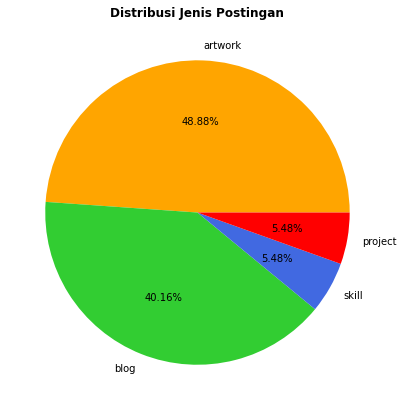

In [ ]:
type_counts = posts['type'].value_counts()
type_labels = type_counts.index
type_percentage = 100 * posts['type'].value_counts(normalize=True)
type_df = pd.DataFrame({'Jumlah': type_counts,
                        'Persentase': type_percentage.round(2)})

print('Distribusi Jenis Postingan')
print('-' * 50)
print(type_df)
print()

plt.figure(figsize=(7, 7))
plt.pie(type_counts, labels=type_labels, autopct='%1.2f%%',
        colors=['orange', 'limegreen', 'royalblue', 'red'])
plt.title('Distribusi Jenis Postingan', fontweight='bold')
plt.show()

**Penjelasan:**

Jenis postingan didominasi oleh *artwork* (karya seni) dengan jumlah postingan sebanyak 241 (48,88%) dan blog dengan jumlah postingan sebanyak 198 (40,16%). Sisanya, jenis postingan *skill* (keahlian) dan *project* (proyek) masing-masing memiliki postingan sebanyak 27 (5,48%). Jadi, data postingan memiliki jumlah postingan yang hampir seimbang antara postingan yang cenderung non-ilmiah (karya seni dan keahlian) dengan postingan yang cenderung ilmiah (blog dan proyek).

### 2.2 Data Pengguna (`users.csv`)

2.2.1 Melihat isi data pengguna yang berada di dalam berkas `users.csv` dengan [pandas](https://pandas.pydata.org) untuk mengenali dan memahami setiap informasi di dalamnya, terutama informasi pada sampel, fitur, dan nilai.

In [ ]:
users = pd.read_csv('users.csv')
users

,_id,name,gender,academics
0,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate
1,5d610ae1653a331687083239,Gaurav Sharma,male,graduate
2,5d618359fc5fcf3bdd9a0910,Akshay Mishra,male,undergraduate
3,5d6d2bb87fa40e1417a49315,Saksham Mathur,male,undergraduate
4,5d7c994d5720533e15c3b1e9,Varun Chowhan,male,undergraduate
...,...,...,...,...
113,5ed35aa376027d35905cca67,Steve,male,graduate
114,5ed3737976027d35905ccaa2,Himanshu Singh,male,undergraduate
115,5ed3748576027d35905ccaab,Parth Vijay,male,undergraduate
116,5ed3cbcbbd514d602c1530a7,Abhishek Mishra,male,undergraduate


**Penjelasan:**

Data pengguna memiliki jumlah sampel (baris) sebanyak 118 sampel dan jumlah fitur (kolom) sebanyak 4 fitur. Berikut adalah penjelasan dari masing-masing fitur pada data pengguna.

1. `_id`, yaitu teks identifikasi unik yang dimiliki setiap pengguna. Fitur ini memiliki nilai berupa teks identifikasi unik pengguna dengan tipe data `string`.
2. `name`, yaitu nama pengguna. Fitur ini memiliki nilai berupa nama pengguna dengan tipe data `string`.
3. `gender`, yaitu jenis kelamin pengguna. Fitur ini memiliki nilai berupa jenis kelamin pengguna dengan tipe data `string`.
4. `academics`, yaitu tingkat pendidikan pengguna. Fitur ini memiliki nilai berupa tingkat pendidikan pengguna dengan tipe data `string`.

2.2.2 Melihat informasi dari setiap fitur untuk mengetahui apakah terdapat kejanggalan atau tidak.

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   _id        118 non-null    object
 1   name       118 non-null    object
 2   gender     118 non-null    object
 3   academics  118 non-null    object
dtypes: object(4)
memory usage: 3.8+ KB


Berdasarkan keluaran tersebut, semua fitur tidak memiliki kejanggalan pada informasinya.

2.2.3 Mengganti nama fitur `_id` menjadi `user_id` agar dalam pengodean tidak tertukar dengan fitur `_id` milik data postingan.

In [ ]:
users = users.rename(columns={'_id': 'user_id'})
users.head()

,user_id,name,gender,academics
0,5d60098a653a331687083238,Nivesh Singh Chauhan,male,undergraduate
1,5d610ae1653a331687083239,Gaurav Sharma,male,graduate
2,5d618359fc5fcf3bdd9a0910,Akshay Mishra,male,undergraduate
3,5d6d2bb87fa40e1417a49315,Saksham Mathur,male,undergraduate
4,5d7c994d5720533e15c3b1e9,Varun Chowhan,male,undergraduate


2.2.4 Melihat jumlah nilai kosong dari setiap fitur. Apabila suatu fitur memiliki nilai kosong maka nilai tersebut harus diperbaiki.

In [ ]:
print('Jumlah nilai kosong:')
users.isna().sum()

Jumlah nilai kosong:


user_id      0
name         0
gender       0
academics    0
dtype: int64

2.2.5 Melihat nilai unik dari fitur `gender` untuk mengetahui seberapa banyak variasi jenis kelamin pengguna.

In [ ]:
unique_gender = users['gender'].unique()
print('Jumlah nilai unik dari fitur "gender":', len(unique_gender))
print('\nDaftar nilai unik dari fitur "gender":')
print(unique_gender.tolist())

Jumlah nilai unik dari fitur "gender": 3

Daftar nilai unik dari fitur "gender":
['male', 'female', 'undefined']


2.2.6 Melihat nilai unik dari fitur `academics` untuk mengetahui seberapa banyak variasi tingkat pendidikan pengguna.

In [ ]:
unique_academics = users['academics'].unique()
print('Jumlah nilai unik dari fitur "academics":', len(unique_academics))
print('\nDaftar nilai unik dari fitur "academics":')
print(unique_academics.tolist())

Jumlah nilai unik dari fitur "academics": 3

Daftar nilai unik dari fitur "academics":
['undergraduate', 'graduate', 'undefined']


2.2.7 Mengecek apakah terdapat sampel duplikat berdasarkan fitur `user_id`. Apabila terdapat sampel duplikat maka sampel duplikatnya harus dihapus sehingga hanya menyisakan satu sampel.

In [ ]:
total_unique_id = len(users['user_id'].unique())
total_sample = len(users)
status = 'Tidak ada' if total_unique_id == total_sample else 'Ada'

print('Status:', status, 'duplikat')
print('Jumlah "user_id" unik:', total_unique_id)
print('Jumlah sampel:', total_sample)

Status: Tidak ada duplikat
Jumlah "user_id" unik: 118
Jumlah sampel: 118


#### 2.2.8 Analisis Univariat

2.2.8.1 Melakukan visualisasi distribusi dari fitur `gender` untuk mengetahui bagaimana persebaran jenis kelamin pengguna.

Distribusi Jenis Kelamin Pengguna
--------------------------------------------------
           Jumlah  Persentase
male           72       61.02
female         44       37.29
undefined       2        1.69



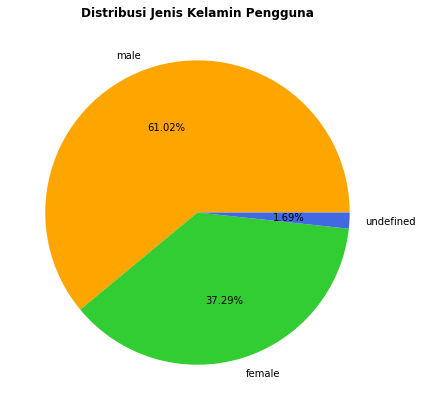

In [ ]:
gender_counts = users['gender'].value_counts()
gender_labels = gender_counts.index
gender_percentage = 100 * users['gender'].value_counts(normalize=True)
gender_df = pd.DataFrame({'Jumlah': gender_counts,
                          'Persentase': gender_percentage.round(2)})

print('Distribusi Jenis Kelamin Pengguna')
print('-' * 50)
print(gender_df)
print()

plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_labels, autopct='%1.2f%%',
        colors=['orange', 'limegreen', 'royalblue'])
plt.title('Distribusi Jenis Kelamin Pengguna', fontweight='bold')
plt.show()

**Penjelasan:**

Jenis kelamin pengguna didominasi oleh *male* (laki-laki) dengan jumlah pengguna sebanyak 72 (61,02%), sedangkan jumlah pengguna *female* (perempuan) sebanyak 44 (37,29%). Selain itu, terdapat juga 2 pengguna yang tidak mendefinisikan jenis kelaminnya (*undefined*). Jadi, data pengguna yang lebih banyak memiliki pengguna berjenis kelamin laki-laki dibandingkan perempuan memungkinkan daftar postingan yang sering dilihat lebih banyak bersifat laki-laki, seperti tentang teknologi, musik, olahraga, dan lainnya.

2.2.8.2 Melakukan visualisasi distribusi dari fitur `academics` untuk mengetahui bagaimana persebaran tingkat pendidikan pengguna.

Distribusi Tingkat Pendidikan Pengguna
--------------------------------------------------
               Jumlah  Persentase
undergraduate      68       57.63
graduate           48       40.68
undefined           2        1.69



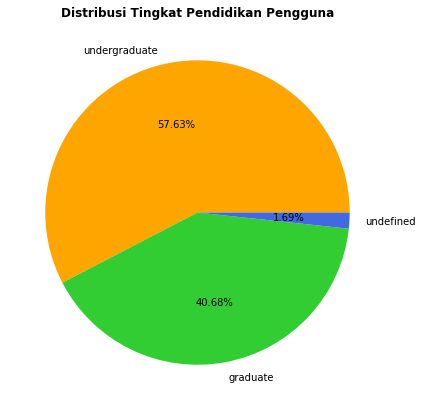

In [ ]:
academics_counts = users['academics'].value_counts()
academics_labels = academics_counts.index
academics_percentage = 100 * users['academics'].value_counts(normalize=True)
academics_df = pd.DataFrame({'Jumlah': academics_counts,
                             'Persentase': academics_percentage.round(2)})

print('Distribusi Tingkat Pendidikan Pengguna')
print('-' * 50)
print(academics_df)
print()

plt.figure(figsize=(7, 7))
plt.pie(academics_counts, labels=academics_labels, autopct='%1.2f%%',
        colors=['orange', 'limegreen', 'royalblue'])
plt.title('Distribusi Tingkat Pendidikan Pengguna', fontweight='bold')
plt.show()

**Penjelasan:**

Tingkat pendidikan pengguna memiliki distribusi yang hampir imbang antara *undergraduate* (sarjana) dengan *graduate* (pascasarjana). Jumlah pengguna dengan tingkat pendidikan sarjana adalah 68 (57,63%), sedangkan jumlah pengguna dengan tingkat pendidikan pascasarjana adalah 48 (40,68%). Selain itu, terdapat juga 2 pengguna yang tidak mendefinisikan tingkat pendidikannya (*undefined*). Jadi, data pengguna didominasi oleh pengguna yang sedang/pernah berkuliah sehingga kemungkinan daftar postingan yang sering dilihat dari pengguna berkaitan dengan ilmu-ilmu keilmiahan.

### 2.3 Data Tayangan (`views.csv`)

2.3.1 Melihat isi data tayangan yang berada di dalam berkas `views.csv` dengan [pandas](https://pandas.pydata.org) untuk mengenali dan memahami setiap informasi di dalamnya, terutama informasi pada sampel, fitur, dan nilai.

In [ ]:
views = pd.read_csv('views.csv')
views

,user_id,post_id,timestamp
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e,2020-06-01T10:46:45.131Z
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,2020-06-01T09:39:20.021Z
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3,2020-06-01T08:12:42.682Z
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d,2020-06-01T08:10:23.880Z
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8,2020-06-01T08:08:54.124Z
...,...,...,...
1444,5d60098a653a331687083238,5e7a60edcfc8b713f5ac7d82,2020-03-26T19:03:55.284Z
1445,5d60098a653a331687083238,5e7a629ccfc8b713f5ac7d84,2020-03-26T19:01:42.384Z
1446,5d60098a653a331687083238,5e7b1e65cfc8b713f5ac7d90,2020-03-26T19:00:25.693Z
1447,5d60098a653a331687083238,5e7cc074cfc8b713f5ac7db0,2020-03-26T18:49:14.721Z


**Penjelasan:**

Data tayangan memiliki jumlah sampel (baris) sebanyak 1.449 sampel dan jumlah fitur (kolom) sebanyak 3 fitur. Berikut adalah penjelasan dari masing-masing fitur pada data tayangan.

1. `user_id`, yaitu teks identifikasi unik yang dimiliki setiap pengguna. Fitur ini memiliki nilai berupa teks identifikasi unik pengguna dengan tipe data `string`.
2. `post_id`, yaitu teks identifikasi unik yang dimiliki setiap postingan. Fitur ini memiliki nilai berupa teks identifikasi unik postingan dengan tipe data `string`.
3. `timestamp`, yaitu tanggal dan jam pengguna melihat postingan. Fitur ini memiliki nilai berupa tanggal dan jam pengguna melihat postingan dengan tipe data `string`.

2.3.2 Melihat informasi dari setiap fitur untuk mengidentifikasi apakah terdapat kejanggalan atau tidak.

In [ ]:
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    1449 non-null   object
 1   post_id    1449 non-null   object
 2   timestamp  1449 non-null   object
dtypes: object(3)
memory usage: 34.1+ KB


Berdasarkan data tersebut, fitur `timestamp` dapat diubah tipe datanya menjadi `datetime` agar nilainya dapat diolah dengan mudah.

2.3.3 Mengubah tipe data fitur `timestamp` menjadi `datetime` agar nilainya memiliki tipe data yang tepat.

In [ ]:
views['timestamp'] = pd.to_datetime(views['timestamp'])
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   user_id    1449 non-null   object             
 1   post_id    1449 non-null   object             
 2   timestamp  1449 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 34.1+ KB


2.3.4 Melihat jumlah nilai kosong dari setiap fitur. Apabila suatu fitur memiliki nilai kosong maka nilai tersebut harus diperbaiki.

In [ ]:
print('Jumlah nilai kosong:')
views.isna().sum()

Jumlah nilai kosong:


user_id      0
post_id      0
timestamp    0
dtype: int64

#### 2.3.5 Analisis Univariat

2.3.5.1 Melakukan visualisasi perbandingan antara pengguna unik dengan postingan unik untuk mengetahui tingkat ketersediaan postingan untuk pengguna.

Perbandingan antara Pengguna Unik dan Postingan Unik
--------------------------------------------------
Jumlah pengguna unik: 118
Jumlah postingan unik: 495



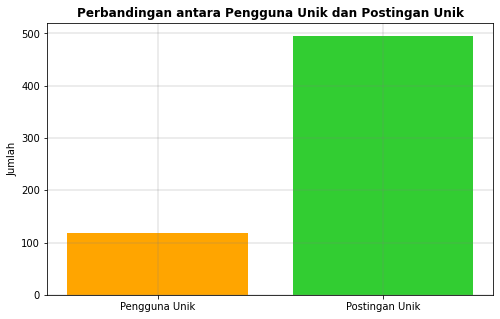

In [ ]:
total_unique_user = len(views['user_id'].unique())
total_unique_post = len(views['post_id'].unique())

print('Perbandingan antara Pengguna Unik dan Postingan Unik')
print('-' * 50)
print('Jumlah pengguna unik:', total_unique_user)
print('Jumlah postingan unik:', total_unique_post)
print()

plt.figure(figsize=(8, 5))
plt.bar(['Pengguna Unik', 'Postingan Unik'],
        height=[total_unique_user, total_unique_post],
        color=['orange', 'limegreen'])
plt.title('Perbandingan antara Pengguna Unik dan Postingan Unik',
          fontweight='bold')
plt.ylabel('Jumlah')
plt.grid(color='gray', linewidth=0.3)
plt.show()

**Penjelasan:**

Perbandingan antara jumlah pengguna unik dengan postingan unik sangat berbeda jauh, hampir lima kali lipat. Jumlah pengguna unik pada data tayangan adalah 118, sedangkan jumlah postingan unik adalah 495. Jadi, ketersediaan postingan untuk pengguna dapat tercukupi karena banyaknya pilihan postingan untuk pengguna.

2.3.5.2 Melakukan visualisasi jumlah tayangan postingan berdasarkan hari akses untuk mengetahui di hari apa pengguna banyak melihat postingan.

Jumlah Tayangan Postingan Berdasarkan Hari Akses
--------------------------------------------------
           Jumlah  Persentase
Friday        263       18.15
Monday        234       16.15
Tuesday       232       16.01
Thursday      227       15.67
Sunday        176       12.15
Saturday      159       10.97
Wednesday     158       10.90



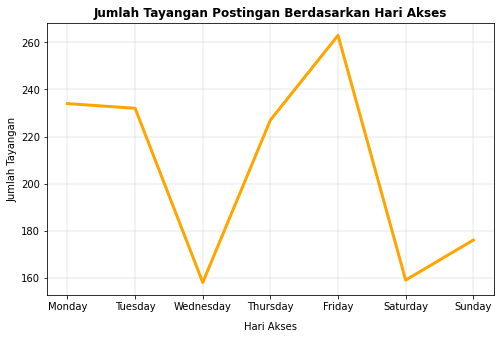

In [ ]:
week_counts = views['timestamp'].dt.strftime('%A').value_counts()
week_percentage = 100 * views['timestamp'].dt.strftime('%A').value_counts(
    normalize=True
)
week_df = pd.DataFrame({'Jumlah': week_counts,
                        'Persentase': week_percentage.round(2)})

print('Jumlah Tayangan Postingan Berdasarkan Hari Akses')
print('-' * 50)
print(week_df)
print()

week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
              'Saturday', 'Sunday']
sorted_week = week_counts.reindex(week_order)

plt.figure(figsize=(8, 5))
plt.plot(sorted_week, color='orange', linewidth=3)
plt.title('Jumlah Tayangan Postingan Berdasarkan Hari Akses',
          fontweight='bold')
plt.xlabel('Hari Akses', labelpad=10)
plt.ylabel('Jumlah Tayangan')
plt.grid('gray', linewidth=0.3)
plt.show()

**Penjelasan:**

Jumlah tayangan pada postingan dari hari ke hari cukup bervariasi. Jumlah tayangan terbanyak ada di hari *Friday* (Jumat) sebanyak 263 (18,15%), sedangkan jumlah tayangan terdikit ada di hari *Wednesday* (Rabu) sebanyak 158 (10,90%). Dari jumlah tayangan tersebut dapat diketahui bahwa pengguna lebih banyak melihat postingan di hari Jumat karena hari tersebut adalah hari kerja terakhir yang memungkinkan pengguna melihat postingan setelah mereka bekerja selama hampir seminggu penuh untuk melepaskan penat. Kemudian di hari berikutnya, *Saturday* (Sabtu), intensitas tayangan postingan menjadi lebih sedikit karena pengguna sudah menghabiskan waktunya melihat banyak postingan di hari Jumat.

### 2.4 Analisis Multivariat

2.4.1 Mengecek keberadaan nilai unik dari fitur `post_id` pada data tayangan di data postingan. Apabila terdapat nilai `post_id` pada data tayangan yang tidak terdapat di data postingan maka hapus sampel dengan nilai tersebut.

In [ ]:
views_post_id = len(views['post_id'].unique())
posts_post_id = len(posts['post_id'].unique())
views = views[views['post_id'].isin(posts['post_id'])]

print('Jumlah "post_id" unik di data tayangan:', views_post_id)
print('Jumlah "post_id" unik di data postingan:', posts_post_id)
print('Jumlah "post_id" unik pada data tayangan yang terdapat di data \
postingan:', len(views['post_id'].unique()))

Jumlah "post_id" unik di data tayangan: 495
Jumlah "post_id" unik di data postingan: 493
Jumlah "post_id" unik pada data tayangan yang terdapat di data postingan: 493


Berdasarkan keluaran tersebut, terdapat dua nilai `post_id` unik pada data tayangan yang tidak berada di data postingan. Oleh karena itu, sampel yang memiliki nilai tersebut harus dihapus.

2.4.2 Mengecek keberadaan nilai unik dari fitur `user_id` pada data tayangan di data pengguna. Apabila terdapat nilai `user_id` pada data tayangan yang tidak terdapat di data pengguna maka hapus sampel dengan nilai tersebut.

In [ ]:
views_user_id = len(views['user_id'].unique())
users_user_id = len(users['user_id'].unique())
views = views[views['user_id'].isin(users['user_id'])]

print('Jumlah "user_id" unik di data tayangan:', views_user_id)
print('Jumlah "user_id" unik di data pengguna:', users_user_id)
print('Jumlah "user_id" unik pada data tayangan yang terdapat di data \
pengguna:', len(views['user_id'].unique()))

Jumlah "user_id" unik di data tayangan: 118
Jumlah "user_id" unik di data pengguna: 118
Jumlah "user_id" unik pada data tayangan yang terdapat di data pengguna: 118


Berdasarkan keluaran tersebut, semua nilai `user_id` unik pada data tayangan terdapat di data pengguna sehingga tidak diperlukan penghapusan sampel.

2.4.3 Melakukan visualisasi pengguna yang paling banyak melihat postingan untuk mengetahui pengguna mana yang paling banyak memberikan informasi pada proses pemodelan dengan metode *collaborative filtering* nanti.

Lima Pengguna Teratas yang Paling Banyak Melihat Postingan
----------------------------------------------------------------------
                   name gender      academics  total_views
1  Nivesh Singh Chauhan   male  undergraduate          230
2         Gaurav Sharma   male       graduate          137
3         Varun Chowhan   male  undergraduate           95
4         Aryan Malakar   male  undergraduate           82
5      siddharth saxena   male  undergraduate           69



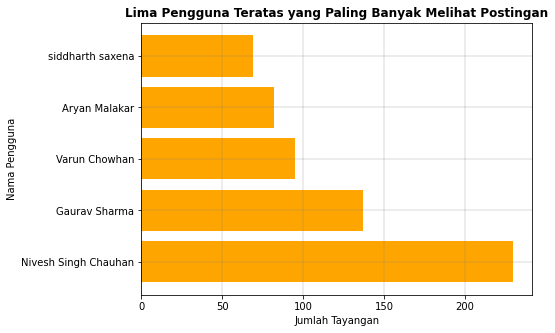

In [ ]:
top_5_users = views['user_id'].value_counts().head(5).to_frame()
top_5_users.columns = ['total_views']

top_5_df = top_5_users.merge(users, how='left', left_index=True,
                             right_on='user_id')
top_5_df = top_5_df[['name', 'gender', 'academics', 'total_views']]
top_5_df.index = list(range(1, 6))

print('Lima Pengguna Teratas yang Paling Banyak Melihat Postingan')
print('-' * 70)
print(top_5_df)
print()

plt.figure(figsize=(7, 5))
plt.barh(y=top_5_df['name'], width=top_5_df['total_views'], color='orange')
plt.title('Lima Pengguna Teratas yang Paling Banyak Melihat Postingan',
          fontweight='bold')
plt.xlabel('Jumlah Tayangan')
plt.ylabel('Nama Pengguna')
plt.grid(color='gray', linewidth=0.3)
plt.show()

**Penjelasan:**

Lima pengguna teratas yang paling banyak melihat postingan adalah pengguna dengan jenis kelamin laki-laki dan sebagian besarnya memiliki tingkat pendidikan sarjana. Jadi, pada data tayangan ini laki-laki lebih aktif melihat postingan dibandingkan perempuan dan pengguna dengan tingkat pendidikan sarjana lebih aktif melihat postingan dibandingkan pascasarjana.

2.4.4 Melakukan visualisasi postingan yang paling banyak dilihat pengguna untuk mengetahui postingan mana yang paling banyak memberikan informasi pada proses pemodelan dengan metode *collaborative filtering* nanti.

Lima Postingan Teratas yang Paling Banyak Dilihat Pengguna
----------------------------------------------------------------------
                                    title     type  total_views
1                                   Daaku  artwork           18
2  Machine Learning”&“Operations" (MlOps)     blog           16
3              The Waves Have Stood Still  artwork           14
4                          Gangster Style  artwork           14
5                       Faith in yourself  artwork           14



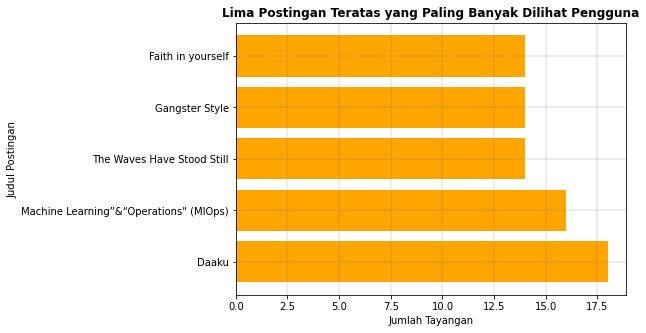

In [ ]:
top_5_posts = views['post_id'].value_counts().head(5).to_frame()
top_5_posts.columns = ['total_views']

top_5_df = top_5_posts.merge(posts, how='left', left_index=True,
                             right_on='post_id')
top_5_df = top_5_df[['title', 'type', 'total_views']]
top_5_df.index = list(range(1, 6))

print('Lima Postingan Teratas yang Paling Banyak Dilihat Pengguna')
print('-' * 70)
print(top_5_df)
print()

plt.figure(figsize=(7, 5))
plt.barh(y=top_5_df['title'], width=top_5_df['total_views'], color='orange')
plt.title('Lima Postingan Teratas yang Paling Banyak Dilihat Pengguna',
          fontweight='bold')
plt.xlabel('Jumlah Tayangan')
plt.ylabel('Judul Postingan')
plt.grid(color='gray', linewidth=0.3)
plt.show()

**Penjelasan:**

Lima postingan teratas yang paling banyak dilihat pengguna sebagian besar merupakan postingan dengan jenis karya seni. Jadi, pada data tayangan ini pengguna lebih tertarik untuk melihat postingan berjenis karya seni dibandingkan tiga jenis postingan lainnya (blog, keahlian, dan proyek). Berarti, dugaan sebelumnya yang menyatakan pengguna akan sering melihat postingan yang bersifat ilmiah kurang tepat. Walaupun sebagian besar pengguna berada di tingkatan pendidikan tinggi, pengguna lebih banyak melihat postingan untuk mencari hiburan bagi dirinya sendiri dibandingkan untuk mencari informasi ilmu keilmiahan.

## 3. Persiapan Data

### 3.1 *Content-Based Filtering*

3.1.1 Membuat data baru berdasarkan data postingan. Fitur utama yang akan digunakan dalam proses pemodelan *content-based filtering* kali ini adalah fitur `category` dan `type` karena kedua fitur tersebut memiliki informasi yang sangat penting untuk menggambarkan karakteristik suatu postingan.

In [ ]:
content = posts[['post_id', 'title', 'category', 'type']].copy()
content

,post_id,title,category,type
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology,blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...,blog
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems,blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings,artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws,blog
...,...,...,...,...
488,5ed3791976027d35905ccab6,CI/CD using GitHub Actions,Computer Technology|Information Technology,blog
489,5ed3820f76027d35905ccac8,Configure Docker with Django; PostgreSQL; Pg-a...,Computer Technology|Computer Application|Infor...,blog
490,5ed3ef4cbd514d602c1530f2,Recommendation Engine,Uncategorized,project
491,5ed415c6bd514d602c15312d,Face Recognition using Transfer Learning.,Science; Technology,skill


3.1.2 Menggabungkan fitur `category` dan `type` menjadi fitur `keywords` karena semua kata dari kedua fitur tersebut akan dijadikan kata kunci yang menggambarkan karakteristik suatu postingan.

In [ ]:
content['keywords'] = content['category'] + ' ' + content['type']
content = content.drop(columns=['category', 'type'])
content.head()

,post_id,title,keywords
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence|Machine Learning|Infor...
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws blog


3.1.3 Menghilangkan semua tanda pemisah kategori yang berupa simbol pipa (`|`) dan tanda titik koma (`;`) dari fitur `keywords` yang sebelumnya menjadi tanda pemisah berbagai kategori dari fitur `category`. Hal ini dilakukan agar model dapat menghubungkan kesamaan di antara postingan melalui kata-kata penting dari fitur `keywords`.

In [ ]:
content['keywords'] = content['keywords'].apply(
    lambda x: x.replace('|', ' ').replace(';', ' ')
)
content.head()

,post_id,title,keywords
0,5d62abaa65218653a132c956,hello there,Plant Biotechnology blog
1,5d6d39567fa40e1417a4931c,Ml and AI,Artificial Intelligence Machine Learning Infor...
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,Operating Systems blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,Drawings artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,Competition Laws blog


3.1.4 Menghapus semua *stop word* pada fitur `keywords` dan mengubah semua kata menjadi huruf kecil (*lower case*). *Stop word* adalah kata-kata umum yang sering muncul dalam jumlah besar pada teks tetapi tidak memiliki makna yang penting, seperti *a*, *the*, *of*, dan lainnya. Karena tidak memiliki makna penting dan sering muncul keberadaannya, *stop word* tidak akan menjadi karakteristik unik dari suatu postingan.

In [ ]:
stop_words = stopwords.words('english')
content['keywords'] = content['keywords'].apply(
    lambda x: ' '.join(
        [word for word in x.lower().split() if word not in stop_words]
    )
)
content.head()

,post_id,title,keywords
0,5d62abaa65218653a132c956,hello there,plant biotechnology blog
1,5d6d39567fa40e1417a4931c,Ml and AI,artificial intelligence machine learning infor...
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,operating systems blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,drawings artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,competition laws blog


3.1.5 Melakukan normalisasi teks berupa *lemmatization* pada fitur `keywords`. *Lemmatization* adalah proses mengubah suatu kata menjadi bentuk dasar yang bermakna dengan melibatkan konteks, contohnya seperti kata `drawings` menjadi `drawing`. Hal ini dilakukan agar kata kunci yang berbeda namun memiliki makna sama tidak dianggap memiliki makna yang berbeda oleh model.

In [ ]:
lemmatizer = WordNetLemmatizer()
content['keywords'] = content['keywords'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)
content.head()

,post_id,title,keywords
0,5d62abaa65218653a132c956,hello there,plant biotechnology blog
1,5d6d39567fa40e1417a4931c,Ml and AI,artificial intelligence machine learning infor...
2,5d7d23315720533e15c3b1ee,What is an Operating System ?,operating system blog
3,5d7d405e5720533e15c3b1f3,Lord Shiva,drawing artwork
4,5d80dfbc6c53455f896e600e,How Competition law evolved?,competition law blog


3.1.6 Melihat semua kata kunci yang berhubungan dengan postingan menggunakan teknik TF–IDF. TF–IDF (Term Frequency–Inverse Document Frequency) adalah sebuah teknik memilih kata yang memiliki makna penting dengan mengukur kata tersebut terhadap kata-kata lain dalam suatu teks. Kata yang memiliki makna penting akan dijadikan kata kunci dan digunakan dalam proses pemodelan nanti.

In [ ]:
tfidf = TfidfVectorizer()
tfidf.fit(content['keywords'])
tfidf.get_feature_names()

['2d',
 'abuse',
 'accounting',
 'acrylic',
 'activity',
 'advertising',
 'agreement',
 'algebra',
 'algorithm',
 'alternate',
 'analysis',
 'animal',
 'application',
 'applied',
 'archeology',
 'architecture',
 'art',
 'articulation',
 'artificial',
 'artistic',
 'artwork',
 'atomic',
 'audit',
 'auditing',
 'banking',
 'basic',
 'behaviour',
 'bio',
 'biology',
 'biotechnology',
 'blog',
 'break',
 'business',
 'calligraphy',
 'capitalist',
 'cardiology',
 'carving',
 'ceramic',
 'chemistry',
 'child',
 'cloud',
 'coaching',
 'colonialism',
 'commerce',
 'communiaction',
 'communication',
 'company',
 'competition',
 'composition',
 'computation',
 'computer',
 'computing',
 'concept',
 'conceptual',
 'control',
 'corporate',
 'cost',
 'craft',
 'creation',
 'creative',
 'culture',
 'custom',
 'cutting',
 'data',
 'database',
 'decision',
 'desigining',
 'design',
 'designing',
 'development',
 'digital',
 'direct',
 'dispute',
 'distribution',
 'drawing',
 'duty',
 'eco',
 'ecology'

Berdasarkan keluaran tersebut, terdapat beberapa kata kunci yang memiliki kesalahan penulisan, seperti *communiaction*, *desigining*, *enviorment*, dan masih banyak lagi. Oleh karena itu, kata-kata tersebut harus diubah ke bentuk kata yang benar.

3.1.7 Memperbaiki kata kunci yang memiliki kesalahan penulisan secara manual dengan bantuan [Grammarly](https://grammarly.com). Grammarly adalah aplikasi pengecek serta perbaikan kata dan kalimat dalam bahasa Inggris secara otomatis sehingga kita dapat memanfaatkan aplikasi tersebut untuk melihat kata kunci apa saja yang memiliki kesalahan penulisan.

![Grammarly](https://drive.google.com/uc?id=1QHCx-5KpodA9KkqiuUbi57BcIBcoRthr)

In [ ]:
typo_words = {
    'communiaction': 'communication',
    'desigining': 'designing',
    'entreperneurship': 'entrepreneurship',
    'enviorment': 'environment',
    'mangememnt': 'management',
    'mangement': 'management',
    'mecahnics': 'mechanics',
    'methadology': 'methodology',
    'organisation': 'organization',
    'portfoilio': 'portfolio',
    'psycholgy': 'psychology',
    'secratarial': 'secretarial'
}
content['keywords'] = content['keywords'].replace(typo_words, regex=True)

tfidf.fit(content['keywords'])
tfidf.get_feature_names()

['2d',
 'abuse',
 'accounting',
 'acrylic',
 'activity',
 'advertising',
 'agreement',
 'algebra',
 'algorithm',
 'alternate',
 'analysis',
 'animal',
 'application',
 'applied',
 'archeology',
 'architecture',
 'art',
 'articulation',
 'artificial',
 'artistic',
 'artwork',
 'atomic',
 'audit',
 'auditing',
 'banking',
 'basic',
 'behaviour',
 'bio',
 'biology',
 'biotechnology',
 'blog',
 'break',
 'business',
 'calligraphy',
 'capitalist',
 'cardiology',
 'carving',
 'ceramic',
 'chemistry',
 'child',
 'cloud',
 'coaching',
 'colonialism',
 'commerce',
 'communication',
 'company',
 'competition',
 'composition',
 'computation',
 'computer',
 'computing',
 'concept',
 'conceptual',
 'control',
 'corporate',
 'cost',
 'craft',
 'creation',
 'creative',
 'culture',
 'custom',
 'cutting',
 'data',
 'database',
 'decision',
 'design',
 'designing',
 'development',
 'digital',
 'direct',
 'dispute',
 'distribution',
 'drawing',
 'duty',
 'eco',
 'ecology',
 'economic',
 'economics',
 'ec

3.1.8 Melakukan transformasi fitur `keywords` menjadi bentuk matriks TF–IDF agar nilai pada fitur tersebut dapat diolah oleh model.

In [ ]:
tfidf_matrix = tfidf.fit_transform(content['keywords'])
print('Ukuran matriks TF-IDF:', tfidf_matrix.shape)

Ukuran matriks TF-IDF: (493, 254)


Berdasarkan keluaran tersebut, TF–IDF telah berhasil mengumpulkan 254 kata penting dengan masing-masing bobot yang berbeda pada 493 postingan.

3.1.9 Menerapkan matriks TF–IDF pada beberapa postingan untuk melihat berapa bobot dari semua kata kunci pada suatu postingan. Bobot tersebut memiliki nilai dengan skala 0–1, 0 berarti tidak memiliki keterkaitan dan 1 berarti sangat memiliki keterkaitan.

In [ ]:
pd.DataFrame(tfidf_matrix.todense(), columns=tfidf.get_feature_names(),
             index=content['title']).head()

,2d,abuse,accounting,acrylic,activity,advertising,agreement,algebra,algorithm,alternate,analysis,animal,application,applied,archeology,architecture,art,articulation,artificial,artistic,artwork,atomic,audit,auditing,banking,basic,behaviour,bio,biology,biotechnology,blog,break,business,calligraphy,capitalist,cardiology,carving,ceramic,chemistry,child,...,sketch,skill,social,society,sociology,sport,start,statuary,story,strategy,study,substance,system,tapestry,tax,taxation,team,tech,technique,technology,test,textile,theory,thought,tradition,transaction,treaty,trend,typography,uncategorized,ups,venture,video,videography,visual,watercolour,web,wood,work,zoology
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
hello there,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.634966,0.230623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ml and AI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45135,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.168205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.273835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
What is an Operating System ?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.239178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.641793,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Lord Shiva,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.496258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
How Competition law evolved?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.257026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.2 *Collaborative Filtering*

3.2.1 Membuat data baru berdasarkan data tayangan. Fitur utama yang akan digunakan dalam proses pemodelan *collaborative filtering* kali ini adalah fitur `user_id` dan `post_id` karena kedua fitur tersebut memberikan informasi berupa pengguna mana yang telah melihat suatu postingan dan postingan apa yang dilihatnya. Pengguna dapat melihat banyak postingan dan postingan dapat dilihat banyak pengguna.

In [ ]:
collab = views[['user_id', 'post_id']].copy()
collab

,user_id,post_id
0,5df49b32cc709107827fb3c7,5ec821ddec493f4a2655889e
1,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6
2,5ed0defa76027d35905cc2de,5eac305f10426255a7aa9dd3
3,5ed0defa76027d35905cc2de,5ed1ff0276027d35905cc60d
4,5ed0defa76027d35905cc2de,5ed3820f76027d35905ccac8
...,...,...
1444,5d60098a653a331687083238,5e7a60edcfc8b713f5ac7d82
1445,5d60098a653a331687083238,5e7a629ccfc8b713f5ac7d84
1446,5d60098a653a331687083238,5e7b1e65cfc8b713f5ac7d90
1447,5d60098a653a331687083238,5e7cc074cfc8b713f5ac7db0


3.2.2 Membuat fitur `total_views` yang berisi nilai seberapa banyak pengguna melihat suatu postingan. Nilai dari fitur tersebut didapatkan dari penggabungan sampel yang memiliki nilai `user_id` dan `post_id` yang sama.

In [ ]:
collab = collab.groupby(list(collab.columns), as_index=False).size()
collab = collab.rename(columns={'size': 'total_views'})
collab

,user_id,post_id,total_views
0,5d60098a653a331687083238,5d62abaa65218653a132c956,1
1,5d60098a653a331687083238,5d6d39567fa40e1417a4931c,1
2,5d60098a653a331687083238,5dbc631f99cbb90e4339c7fd,1
3,5d60098a653a331687083238,5dc065ca24b883670268772f,1
4,5d60098a653a331687083238,5ddeb6e80eb5e25a8a07f065,1
...,...,...,...
1390,5ed3748576027d35905ccaab,5ed3791976027d35905ccab6,1
1391,5ed3748576027d35905ccaab,5ed3820f76027d35905ccac8,1
1392,5ed3748576027d35905ccaab,5ed4cbadbd514d602c1531a6,1
1393,5ed3cbcbbd514d602c1530a7,5ed1ff0276027d35905cc60d,1


3.2.3 Melakukan *encoding* pada nilai fitur `user_id` menjadi nilai angka/numerik agar dapat diolah oleh model saat pemodelan nanti.

In [ ]:
user_ids = collab['user_id'].unique().tolist()
print('Daftar "user_id":', user_ids)

user_to_encoded_user = {i[1]: i[0] for i in enumerate(user_ids)}
print('"user_id" ke angka:', user_to_encoded_user)

encoded_user_to_user = {i[0]: i[1] for i in enumerate(user_ids)}
print('Angka ke "user_id":', encoded_user_to_user)

Daftar "user_id": ['5d60098a653a331687083238', '5d610ae1653a331687083239', '5d618359fc5fcf3bdd9a0910', '5d6d2bb87fa40e1417a49315', '5d7c994d5720533e15c3b1e9', '5d90fc1a641ef364939fb6cc', '5d9a2982979d5962253c2f81', '5de50d768eab6401affbb135', '5ded443342a8854bf6eaba9a', '5deeef6142a8854bf6eabab9', '5defd51362624b0135ea9fd2', '5df11ee1ee4bb5252b4f5344', '5df20f1fee4bb5252b4f5351', '5df24eeaee4bb5252b4f5366', '5df3f8f2ee4bb5252b4f5393', '5df49b32cc709107827fb3c7', '5e0d5ce12a37d20505da2a5d', '5e1ef04c2a37d20505da2b8b', '5e26bb482a37d20505da2c10', '5e3563348d344822fed4d13a', '5e35a5ed8d344822fed4d13e', '5e365e758d344822fed4d144', '5e37b16ceab55d319938a6f8', '5e4195c3eab55d319938a82c', '5e4ce251f5561b1994c8e40d', '5e5855ced701ab08af792b51', '5e5af599d701ab08af792b63', '5e5b4511d701ab08af792b6d', '5e5dfbbefbc8805f69e02c91', '5e783375cfc8b713f5ac7c5b', '5e78ce84cfc8b713f5ac7cee', '5e7b30a6cfc8b713f5ac7d95', '5e7cf05bcfc8b713f5ac7db7', '5e7dde87a3258347b42f2108', '5e7de336a3258347b42f210e', '

3.2.4 Melakukan *encoding* pada nilai fitur `post_id` menjadi angka/numerik agar dapat diolah oleh model saat pemodelan nanti.

In [ ]:
post_ids = collab['post_id'].unique().tolist()
print('Daftar "post_id":', post_ids)

post_to_encoded_post = {i[1]: i[0] for i in enumerate(post_ids)}
print('"post_id" ke angka:', post_to_encoded_post)

encoded_post_to_post = {i[0]: i[1] for i in enumerate(post_ids)}
print('Angka ke "post_id":', encoded_post_to_post)

Daftar "post_id": ['5d62abaa65218653a132c956', '5d6d39567fa40e1417a4931c', '5dbc631f99cbb90e4339c7fd', '5dc065ca24b883670268772f', '5ddeb6e80eb5e25a8a07f065', '5e1029f22a37d20505da2a79', '5e294fd1c85ab714a7da6643', '5e2d36ebc85ab714a7da66d1', '5e52fd0ed701ab08af792a1f', '5e5b59cbd701ab08af792b90', '5e5b6320d701ab08af792b9d', '5e7082f91b24db0468e90cc5', '5e7304761b24db0468e90ce7', '5e773e15cfc8b713f5ac7ad9', '5e782cd9cfc8b713f5ac7c4f', '5e7838bdcfc8b713f5ac7c99', '5e78c64acfc8b713f5ac7ce7', '5e7a0d85cfc8b713f5ac7d77', '5e7a5ebdcfc8b713f5ac7d7f', '5e7a5f5dcfc8b713f5ac7d80', '5e7a60edcfc8b713f5ac7d82', '5e7a629ccfc8b713f5ac7d84', '5e7a63c2cfc8b713f5ac7d86', '5e7a7066cfc8b713f5ac7d88', '5e7b1e65cfc8b713f5ac7d90', '5e7b8764cfc8b713f5ac7da2', '5e7bd922cfc8b713f5ac7da9', '5e7c7a44cfc8b713f5ac7dac', '5e7cc074cfc8b713f5ac7db0', '5e7de250a3258347b42f210a', '5e7de48ca3258347b42f2110', '5e7df068a3258347b42f2125', '5e7df283a3258347b42f2128', '5e7e66e7a3258347b42f213c', '5e7f39a3a3258347b42f2151', '

3.2.5 Memetakan hasil *encoding* dari fitur `user_id` ke kolom baru `user` dan `post_id` ke kolom baru `post`. Kedua fitur tersebut yang akan digunakan dalam proses pemodelan bersama dengan fitur `total_views` agar model dapat mengolah nilai-nilainya.

In [ ]:
collab['user'] = collab['user_id'].map(user_to_encoded_user)
collab['post'] = collab['post_id'].map(post_to_encoded_post)
collab.head()

,user_id,post_id,total_views,user,post
0,5d60098a653a331687083238,5d62abaa65218653a132c956,1,0,0
1,5d60098a653a331687083238,5d6d39567fa40e1417a4931c,1,0,1
2,5d60098a653a331687083238,5dbc631f99cbb90e4339c7fd,1,0,2
3,5d60098a653a331687083238,5dc065ca24b883670268772f,1,0,3
4,5d60098a653a331687083238,5ddeb6e80eb5e25a8a07f065,1,0,4


3.2.6 Melihat jumlah pengguna, jumlah postingan, jumlah tayangan minimum, dan jumlah tayangan maksimum untuk mengetahui informasi dari data yang akan diolah oleh model.

In [ ]:
total_users = len(collab['user'].unique())
total_posts = len(collab['post'].unique())
min_views = collab['total_views'].min()
max_views = collab['total_views'].max()

print('Jumlah pengguna:', total_users)
print('Jumlah postingan:', total_posts)
print('Jumlah tayangan minimum:', min_views)
print('Jumlah tayangan maksimum:', max_views)

Jumlah pengguna: 118
Jumlah postingan: 493
Jumlah tayangan minimum: 1
Jumlah tayangan maksimum: 5


Berdasarkan keluaran tersebut, jumlah postingan lebih banyak lima kali lipat dibandingkan jumlah pengguna. Hal tersebut menandakan ketersediaan postingan untuk pengguna dapat tercukupi dan pilihan postingan lebih variatif untuk pengguna.

3.2.7 Mengacak data agar persebaran sampelnya tidak menumpuk di satu pengguna.

In [ ]:
collab = collab.sample(frac=1, random_state=32)
collab.head()

,user_id,post_id,total_views,user,post
737,5df49b32cc709107827fb3c7,5e7a0fa1cfc8b713f5ac7d78,1,15,402
1319,5ecb979eeaff6b0c3a58a4f0,5ed415c6bd514d602c15312d,1,87,489
561,5deeef6142a8854bf6eabab9,5ec7a699ec493f4a2655883a,1,9,193
1080,5e902793a3258347b42f2733,5e9028cea3258347b42f2736,1,48,242
59,5d60098a653a331687083238,5e866cffa3258347b42f24ef,1,0,59


3.2.8 Membagi data menjadi data latih dan data validasi dengan fitur `post`, `user`, dan `total_views`. Fitur yang akan menjadi data target adalah fitur `total_views`. Data latih akan diambil 80% dari data keseluruhan dan data validasi akan diambil dari sisa data keseluruhan (20%). Sebelum itu, fitur `total_views` harus dilakukan skala ulang terlebih dahulu pada nilainya menjadi skala 0–1 agar model dapat bekerja lebih baik.

In [ ]:
X = collab[['user', 'post']].values
y = collab['total_views'].apply(
    lambda x: (x - min_views) / (max_views - min_views)).values

train_indices = int(0.8 * len(collab))
X_train, X_val, y_train, y_val = (
    X[:train_indices], X[train_indices:], y[:train_indices], y[train_indices:]
)

print('Jumlah data latih: {} (80%)'.format(len(X_train)))
print('Jumlah data validasi: {} (20%)'.format(len(X_val)))
print('Jumlah data keseluruhan:', len(collab))

Jumlah data latih: 1116 (80%)
Jumlah data validasi: 279 (20%)
Jumlah data keseluruhan: 1395


## 4. Pemodelan

### 4.1 *Content-Based Filtering*

4.1.1 Menghitung tingkat kesamaan antara suatu postingan dengan postingan lainnya berdasarkan matriks TF–IDF dengan kesamaan kosinus (*cosine similarity*). Kesamaan kosinus mengukur kesamaan antara dua vektor dan menentukan apakah kedua vektor tersebut menunjuk ke arah yang sama. Kesamaan kosinus akan menghitung sudut kosinus antara dua vektor, semakin kecil sudut kosinus tersebut maka akan semakin besar pula tingkat kesamaannya. Jadi, pada kasus kali ini kesamaan kosinus akan membandingkan dua postingan beserta bobot dari setiap kata kunci, semakin banyak kedua postingan memiliki kesamaan berdasarkan kata kunci maka akan semakin besar pula tingkat kesamaannya.

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.03879194, 0.05515978, ..., 0.        , 0.        ,
        0.04050004],
       [0.03879194, 1.        , 0.04023098, ..., 0.        , 0.12355439,
        0.32952431],
       [0.05515978, 0.04023098, 1.        , ..., 0.        , 0.        ,
        0.04200244],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.12355439, 0.        , ..., 0.        , 1.        ,
        0.25798953],
       [0.04050004, 0.32952431, 0.04200244, ..., 0.        , 0.25798953,
        1.        ]])

4.1.2 Melihat tingkat kesamaan kosinus dari beberapa postingan berdasarkan bobot setiap kata kunci pada matriks TF–IDF. Tingkat kesamaan tersebut memiliki nilai dengan skala 0–1, 0 berarti tidak ada kesamaan dan 1 berarti sangat sama.

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=content['title'],
                             columns=content['title'])
cosine_sim_df.sample(5, axis=1).sample(5, axis=0)

title,Oliveres mediterrànies,HOW TO PREPARE YOURSELF FOR A BETTER TOMORROW?,Habit.,Applications of mobile computing,Human Resource Management
title,,,,,
Distracted? Unfocused? Used This Method To Avoid Distraction.,0.026801,0.037192,0.0000,0.039401,0.030372
Solitude,0.000000,0.000000,0.1018,0.000000,0.000000
Bloom to life,0.000000,0.000000,0.1018,0.000000,0.000000
Operators In PHP,0.022261,0.030892,0.0000,0.728842,0.025227
Designing Cmos circuit from Boolean expressions (Microwind),0.000000,0.000000,0.0000,0.000000,0.000000


4.1.3 Membuat kelas yang dapat menampilkan daftar rekomendasi postingan berdasarkan suatu postingan. Kelas ini akan menggunakan tingkat kesamaan kosinus untuk membuat daftar postingan yang memiliki kesamaan dengan suatu postingan. Kelas akan diberi nama `ContentRecommender` dan memiliki tiga pilihan keluaran, yaitu daftar rekomendasi dalam bentuk bingkai data (*data frame*) yang diakses melalui metode `frame`, daftar rekomendasi dalam bentuk teks laporan yang diakses melalui metode `text`, dan informasi postingan acuan dalam bentuk bingkai data yang diakses melalui metode `base`. Postingan yang akan dijadikan acuan untuk mencari daftar rekomendasi dapat dimasukkan melalui parameter `value` berdasarkan fitur tertentu yang ditentukan dari parameter `by`. Fitur yang diperbolehkan untuk menentukan postingan acuan adalah fitur `post_id` dan `title`. Selain itu, jumlah daftar rekomendasi dapat ditentukan melalui parameter `n` dan tingkat kesamaan kosinus akan ditampilkan atau tidak melalui parameter `metric`.

In [ ]:
class ContentRecommender:
    def __init__(self, by, value, n=5, metric=True):
        accepted_features = ['post_id', 'title']
        if by not in accepted_features:
            raise ValueError(
                'Daftar fitur untuk menentukan postingan acuan: {}'.format(
                    accepted_features))
        elif metric not in [True, False]:
            raise ValueError(
                'Argumen "metric" harus boolean: {} atau {}.'.format(
                    True, False))

        self.by = by
        self.value = value
        self.n = n
        self.metric= metric
        self.base_index = posts[posts[self.by] == self.value].index.values[0]

    def base(self):
        return posts.iloc[[self.base_index]]

    def frame(self):
        closest_posts = list(enumerate(cosine_sim[self.base_index]))
        closest_posts.pop(self.base_index)
        sorted_closest_posts = sorted(
            closest_posts, key=(lambda x: x[1]), reverse=True
        )

        top_recomm = [sorted_closest_posts[i] for i in range(self.n)]
        top_recomm_index = [i[0] for i in top_recomm]
        top_recomm_metric = [i[1] for i in top_recomm]

        top_recomm_df = posts.iloc[top_recomm_index].copy()
        top_recomm_df.index = range(1, self.n+1)

        if self.metric:
            top_recomm_df['metric'] = top_recomm_metric
            top_recomm_df['metric'] = top_recomm_df['metric'].round(2)

        return top_recomm_df

    def text(self):
        columns_in_id = {
            'title': 'Judul', 'category': 'Kategori', 'type': 'Jenis',
            'metric': 'Tingkat Kesamaan'
        }
        base = self.base()
        base = base.drop(columns='post_id')
        base = base.rename(columns=columns_in_id)      
        top_recomm = self.frame()
        top_recomm = top_recomm.drop(columns='post_id')
        top_recomm = top_recomm.rename(columns=columns_in_id)

        print('=' * 70)
        print('SISTEM REKOMENDASI POSTINGAN BERDASARKAN SUATU POSTINGAN')
        print('=' * 70)
        print('Postingan Acuan')
        print('-' * 70)
        with pd.option_context('display.max_colwidth', 20):
            print(base)
        print('-' * 70)
        print('Daftar Rekomendasi Postingan')
        print('-' * 70)
        with pd.option_context('display.max_colwidth', 20):
            print(top_recomm)
        if self.metric:
            metric_mean = round(top_recomm['Tingkat Kesamaan'].mean(), 2)
            print('-' * 70)
            print('Nilai Rata-Rata Tingkat Kesamaan: {} ({}%)'.format(
                metric_mean, int(metric_mean * 100)))
        print('=' * 70)

### 4.2 *Collaborative Filtering*

4.2.1 Membuat kelas model bernama `RecommenderNet` dengan teknik *embedding*. Model akan menghitung skor kecocokan antara pengguna dengan postingan melalui teknik tersebut. Selanjutnya, model akan melakukan operasi perkalian *dot product* antara *embedding* pengguna dengan postingan. Selain itu, model juga akan menambahkan bias untuk setiap pengguna dan postingan. Skor kecocokan ditetapkan dalam skala 0–1 dengan fungsi aktivasi *sigmoid*.

In [ ]:
class RecommenderNet(keras.Model):
    def __init__(self, total_users, total_posts, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.total_users = total_users
        self.total_posts = total_posts
        self.embedding_size = embedding_size
        self.user_embedding = keras.layers.Embedding(
            total_users, embedding_size, embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.user_bias = keras.layers.Embedding(total_users, 1)
        self.post_embedding = keras.layers.Embedding(
            total_posts, embedding_size, embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )
        self.post_bias = keras.layers.Embedding(total_posts, 1)
    
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        post_vector = self.post_embedding(inputs[:, 1])
        post_bias = self.post_bias(inputs[:, 1])
        dot_user_post = tf.tensordot(user_vector, post_vector, 2)
        X = dot_user_post + user_bias + post_bias

        return tf.nn.sigmoid(X)

4.2.2 Melakukan *compile* pada model dengan beberapa pengaturan, seperti menetapkan *loss* Binary Cross-entropy, *optimizer* Adam, dan metrik Root Mean Squared Error (RMSE).

In [ ]:
model = RecommenderNet(total_users, total_posts, embedding_size=5)
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=keras.metrics.RootMeanSquaredError()
)

4.2.3 Membuat *callback* untuk menghentikan proses pelatihan model apabila nilai metrik RMSE pada data validasi sudah mencapai target, yaitu di bawah 0,1.

In [ ]:
class ModelCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        val_rmse_target = 0.1
        if logs.get('val_root_mean_squared_error') < val_rmse_target:
            print('\nMetrik RMSE pada data validasi sudah mencapat target!')
            print('Target: <', val_rmse_target)
            self.model.stop_training = True

4.2.4 Melatih model dengan menjalankan 100 epoch dan menyimpan hasil pelatihannya ke dalam sebuah variabel yang nanti akan digunakan untuk melakukan proses visualisasi metrik RMSE.

In [ ]:
model_history = model.fit(
    X_train, y_train, batch_size=8, epochs=100, validation_data=(X_val, y_val),
    callbacks=ModelCallback()
)

Epoch 1/100
140/140 [==============================] - 1s 3ms/step - loss: 0.6692 - root_mean_squared_error: 0.4810 - val_loss: 0.6434 - val_root_mean_squared_error: 0.4696
Epoch 2/100
140/140 [==============================] - 0s 1ms/step - loss: 0.6142 - root_mean_squared_error: 0.4517 - val_loss: 0.6039 - val_root_mean_squared_error: 0.4482
Epoch 3/100
140/140 [==============================] - 0s 1ms/step - loss: 0.5564 - root_mean_squared_error: 0.4191 - val_loss: 0.5621 - val_root_mean_squared_error: 0.4247
Epoch 4/100
140/140 [==============================] - 0s 1ms/step - loss: 0.4930 - root_mean_squared_error: 0.3812 - val_loss: 0.5147 - val_root_mean_squared_error: 0.3971
Epoch 5/100
140/140 [==============================] - 0s 2ms/step - loss: 0.4226 - root_mean_squared_error: 0.3364 - val_loss: 0.4616 - val_root_mean_squared_error: 0.3646
Epoch 6/100
140/140 [==============================] - 0s 1ms/step - loss: 0.3500 - root_mean_squared_error: 0.2869 - val_loss: 0.4048 

4.2.5 Membuat kelas yang dapat menampilkan daftar rekomendasi postingan berdasarkan postingan apa saja yang sering dilihat pengguna. Kelas ini akan memberikan rekomendasi berdasarkan model yang telah dilatih sebelumnya, yaitu `RecommenderNet`. Kelas akan diberi nama `CollaborativeRecommender` dan memiliki tiga pilihan keluaran, yaitu daftar rekomendasi dalam bentuk bingkai data (*data frame*) yang diakses melalui metode `frame`, daftar rekomendasi dalam bentuk teks laporan yang diakses melalui metode `text`, dan daftar postingan yang sering dilihat pengguna dalam bingkai data yang diakses melalui metode `most_viewed`. Pengguna yang akan diberikan daftar rekomendasi dapat dimasukkan melalui fitur `user_id` di parameter `user_id` dan jumlah daftar rekomendasi dapat ditentukan melalui parameter `n`.

In [ ]:
class CollaborativeRecommender:
    def __init__(self, user_id, n=5):
        self.user_id = user_id
        self.n = n

    def frame(self):
        viewed_posts = collab[collab['user_id'] == self.user_id]['post_id']
        unviewed_posts = posts[~posts['post_id'].isin(viewed_posts)]['post_id']
        unviewed_posts = list(
            set(unviewed_posts).intersection(set(collab['post_id']))
        )

        encoded_user = user_to_encoded_user[self.user_id]
        encoded_unviewed_posts = [
            [post_to_encoded_post[i]] for i in unviewed_posts
        ]
        user_unviewed_posts = np.hstack(
            ([[encoded_user]] * len(unviewed_posts), encoded_unviewed_posts)
        )

        top_recomm = model.predict(user_unviewed_posts).flatten()
        top_recomm_indices = top_recomm.argsort()[-self.n:][::-1]
        top_recomm_ids = [
            encoded_unviewed_posts[i][0] for i in top_recomm_indices
        ]
        top_recomm_ids = [encoded_post_to_post[i] for i in top_recomm_ids]
        top_recomm_df = pd.DataFrame(
            posts[posts['post_id'].isin(top_recomm_ids)]
        )
        top_recomm_df.index = range(1, self.n+1)

        return top_recomm_df

    def most_viewed(self, n=5):
        most_viewed = collab[collab['user_id'] == self.user_id]
        most_viewed = most_viewed.sort_values('total_views', ascending=False)
        most_viewed = most_viewed.head(n)
        most_viewed = most_viewed.drop(columns=['user_id', 'user', 'post'])
        most_viewed = posts.merge(most_viewed, how='right', on='post_id')
        most_viewed.index = range(1, self.n+1)
        
        return most_viewed

    def text(self):
        columns_in_id = {
            'title': 'Judul', 'category': 'Kategori', 'type': 'Jenis',
            'total_views': 'Jumlah Tayangan'
        }
        user = users[users['user_id'] == self.user_id].iloc[0]
        most_viewed = self.most_viewed().drop(columns='post_id')
        most_viewed = most_viewed.rename(columns=columns_in_id)
        top_recomm = self.frame().drop(columns='post_id')
        top_recomm = top_recomm.rename(columns=columns_in_id)

        print('=' * 70)
        print('SISTEM REKOMENDASI POSTINGAN BERDASARKAN PENGGUNA')
        print('=' * 70)
        print('Pengguna: {} ({})'.format(user['name'], user['user_id']))
        print('-' * 70)
        print('Postingan yang Sering Dilihat Pengguna')
        print('-' * 70)
        with pd.option_context('display.max_colwidth', 20):
            print(most_viewed)
        print('-' * 70)
        print('Daftar Rekomendasi Postingan untuk Pengguna')
        print('-' * 70)
        with pd.option_context('display.max_colwidth', 20):
            print(top_recomm)
        print('=' * 70)

## 5. Evaluasi

### 5.1 *Content-Based Filtering*

5.1.1 Menampilkan lima daftar rekomendasi postingan dalam bentuk bingkai data melalui fitur `post_id` dengan postingan acak sebagai postingan acuannya.

In [ ]:
random_post_id = posts.sample(1, random_state=120)['post_id'].values[0]
content_recommender = ContentRecommender(by='post_id', value=random_post_id)
content_recommender.frame()

,post_id,title,category,type,metric
1,5e733f1c1b24db0468e90cf1,Benefits of Guest Posting to both Writers and ...,Marketing|Promotion And Distribution Decisions,blog,1.00
2,5ea85c1f10426255a7aa9c05,Innovative Marketing Strategies,Marketing|Principles Of Marketing|Internationa...,blog,0.79
3,5e85054fa3258347b42f24a0,How Artificial Intelligence tools Help You To ...,Marketing|Marketing Management,blog,0.41
4,5e9eececa3258347b42f2e11,Innovative Marketing Strategies,Marketing|Principles Of Marketing|Marketing Re...,blog,0.39
5,5e5e3b35fbc8805f69e02c9e,Importance of Digital Marketing for Startups,Marketing|Advertising,blog,0.31


5.1.2 Membandingkan daftar rekomendasi postingan dengan postingan acuannya, apakah terdapat kesamaan atau tidak.

In [ ]:
content_recommender.base()

,post_id,title,category,type
184,5e816629a3258347b42f21c2,Employee Stock Option and Buyback Securities.,Marketing|Promotion And Distribution Decisions,blog


**Penjelasan:**

Setiap postingan yang direkomendasikan memiliki tingkat kesamaan yang bervariasi dengan postingan acuannya, mulai dari 1,00 (100%) hingga 0,31 (31%) dalam lima rekomendasi postingan teratas. Nilai rata-rata tingkat kesamaan dalam lima rekomendasi postingan teratas adalah 0,58 (58%). Postingan acuan merupakan postingan berjenis blog dan memiliki kategori pemasaran (*marketing*). Jadi, postingan yang direkomendasikan adalah postingan yang juga berjenis blog dan memiliki kategori pemasaran. Tingkat kesamaan yang bervariasi pada daftar rekomendasi tersebut dikarenakan terdapat beberapa kategori rekomendasi postingan yang tidak ada di postingan acuan sehingga tingkat kesamaannya tidak terlalu besar.

Untuk mengetahui performa model dalam memberikan postingan yang relevan, model dapat dievaluasi menggunakan metrik presisi (*precision*). Metrik tersebut akan melihat seberapa banyak model memberikan rekomendasi yang relevan dibandingkan memberikan rekomendasi yang tidak relevan. Untuk menentukan suatu postingan relevan atau tidak, kita dapat menetapkannya berdasarkan tingkat kesamaannya. Bila tingkat kesamaan suatu rekomendasi postingan di atas atau sama dengan 0,75 (>= 75%) maka postingan tersebut dapat dikatakan relevan dengan postingan acuan, begitu pun sebaliknya. Jadi, dari lima rekomendasi postingan tersebut dapat diketahui bahwa dua postingan teratas merupakan postingan relevan dan tiga sisanya merupakan postingan tidak relevan sehingga nilai presisinya adalah (2 / [2 + 3]) = 0,4 (40%).

5.1.3 Menampilkan lima daftar rekomendasi postingan dalam bentuk teks laporan melalui fitur `title` dengan postingan acak sebagai postingan acuannya.

In [ ]:
random_post_title = posts.sample(1, random_state=421)['title'].values[0]
ContentRecommender(by='title', value=random_post_title).text()

SISTEM REKOMENDASI POSTINGAN BERDASARKAN SUATU POSTINGAN
Postingan Acuan
----------------------------------------------------------------------
        Judul  Kategori    Jenis
100  Mahakaal  Drawings  artwork
----------------------------------------------------------------------
Daftar Rekomendasi Postingan
----------------------------------------------------------------------
           Judul  Kategori    Jenis  Tingkat Kesamaan
1     Lord Shiva  Drawings  artwork               1.0
2        Trident  Drawings  artwork               1.0
3     Lord shiva  Drawings  artwork               1.0
4         Kid Bu  Drawings  artwork               1.0
5  Shadow Sketch  Drawings  artwork               1.0
----------------------------------------------------------------------
Nilai Rata-Rata Tingkat Kesamaan: 1.0 (100%)


**Penjelasan:**

Setiap postingan yang direkomendasikan memiliki tingkat kesamaan 100% dengan postingan acuannya. Postingan acuan merupakan postingan berjenis karya seni (*artwork*) dengan kategori menggambar (*drawings*). Jadi, postingan yang direkomendasikan adalah postingan yang juga berjenis karya seni dengan kategori menggambar. Setiap rekomendasi postingan memiliki kategori yang juga dimiliki oleh postingan acuan sehingga tingkat kesamaannya mencapai 100%.

Karena semua rekomendasi postingan merupakan postingan yang relevan (tingkat kesamaannya di atas atau sama dengan 75%), dapat disimpulkan bahwa model dalam memberikan rekomendasi postingan berdasarkan postingan acuan ke-2 memiliki nilai presisi sebesar (5 / [5 + 0]) = 1,0 (100%).

### 5.2 *Collaborative Filtering*

5.2.1 Melakukan visualisasi nilai metrik RMSE untuk mengetahui seberapa jauh kesalahan antara hasil rekomendasi model dengan yang sebenarnya. Semakin kecil nilai RMSE maka akan semakin baik pula hasil rekomendasi model.

Nilai RMSE data latih pada epoch terakhir (22 epoch): 0.0602
Nilai RMSE data validasi pada epoch terakhir (22 epoch): 0.0981



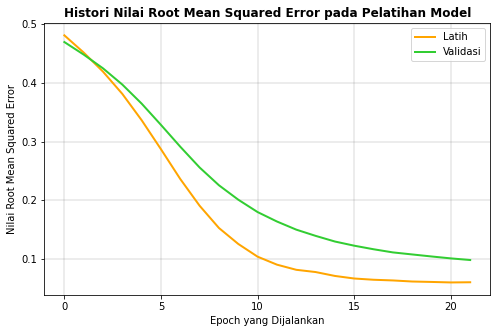

In [ ]:
rmse_history = model_history.history['root_mean_squared_error']
val_rmse_history = model_history.history['val_root_mean_squared_error']
total_epoch = len(rmse_history)

print('Nilai RMSE data latih pada epoch terakhir ({} epoch): {}'.format(
    total_epoch, round(rmse_history[-1], 4)
))
print('Nilai RMSE data validasi pada epoch terakhir ({} epoch): {}'.format(
    total_epoch, round(val_rmse_history[-1], 4)
))
print()

plt.figure(figsize=(8, 5))
plt.plot(rmse_history, color='orange', linewidth=2)
plt.plot(val_rmse_history, color='limegreen', linewidth=2)
plt.title('Histori Nilai Root Mean Squared Error pada Pelatihan Model',
          fontweight='bold')
plt.xlabel('Epoch yang Dijalankan')
plt.ylabel('Nilai Root Mean Squared Error')
plt.legend(['Latih', 'Validasi'], loc='upper right')
plt.grid(color='gray', linewidth=0.3)
plt.show()

**Penjelasan:**

Nilai RMSE dari epoch pertama hingga epoch ke-22 mengalami penurunan yang cukup baik. Nilai RMSE pada data latih di epoch terakhir adalah 0,0602 dan nilai RMSE pada data validasi adalah 0,0981. Nilai dengan angka tersebut menunjukkan bahwa model dapat memberikan daftar rekomendasi dengan kesalahan yang sangat kecil, bahkan tidak lebih dari 0,1.

5.2.2 Menampilkan lima daftar rekomendasi postingan dalam bentuk bingkai data berdasarkan pengguna dengan indeks pertama.

In [ ]:
first_user_id = users.head(1)['user_id'].values[0]
collab_recommender = CollaborativeRecommender(first_user_id)
collab_recommender.frame()

,post_id,title,category,type
1,5dada89b610ba040fbfdf591,Kid Bu,Drawings,artwork
2,5dbc622a99cbb90e4339c7f6,Best friend,Graphic Design|Visual Arts|Illustration|Graphic,artwork
3,5e45b5c9f5561b1994c8e32d,EDI (Electronic data interchange),E Commerce|Other Online Platforms,blog
4,5e773c0bcfc8b713f5ac7ab7,Study of Nerves,Physiology|Neurology,blog
5,5e964006a3258347b42f2a65,Interesting Facts On India That You Had No Ide...,History|Indian History,blog


5.2.3 Membandingkan daftar rekomendasi postingan dengan postingan yang sering dilihat pengguna untuk mengetahui apakah daftar rekomendasi yang diberikan relevan.

In [ ]:
collab_recommender.most_viewed()

,post_id,title,category,type,total_views
1,5e830a6ca3258347b42f23f6,Dog❤️,Photography,artwork,3
2,5e8448aba3258347b42f2447,JUSTICE FOR NORTH EAST,Human Rights|Fundamental Rights,blog,2
3,5e7df283a3258347b42f2128,screw2,Photography,artwork,2
4,5e7b1e65cfc8b713f5ac7d90,Shiva Portrait,Drawings,artwork,2
5,5e8bfa8aa3258347b42f2611,Are We Alone In The Universe?,Archeology|Human Prehistory,blog,2


**Penjelasan:**

Daftar rekomendasi postingan pada pengguna dengan indeks pertama dibandingkan dengan postingan yang sering dilihatnya memiliki kesamaan yang relevan. Postingan yang sering dilihat pengguna adalah postingan berjenis karya seni dan blog, sedangkan postingan yang direkomendasikan juga postingan berjenis karya seni dan blog. Jadi, dapat diketahui bahwa model telah berhasil memberikan daftar rekomendasi postingan yang cukup relevan kepada pengguna tertentu berdasarkan histori tayangan postingan.

5.2.4 Menampilkan daftar rekomendasi postingan beserta daftar postingan yang sering dilihat pengguna dengan format yang berbeda, yaitu teks laporan.

In [ ]:
collab_recommender.text()

SISTEM REKOMENDASI POSTINGAN BERDASARKAN PENGGUNA
Pengguna: Nivesh Singh Chauhan (5d60098a653a331687083238)
----------------------------------------------------------------------
Postingan yang Sering Dilihat Pengguna
----------------------------------------------------------------------
                 Judul             Kategori    Jenis  Jumlah Tayangan
1                Dog❤️          Photography  artwork                3
2  JUSTICE FOR NORT...  Human Rights|Fun...     blog                2
3               screw2          Photography  artwork                2
4       Shiva Portrait             Drawings  artwork                2
5  Are We Alone In ...  Archeology|Human...     blog                2
----------------------------------------------------------------------
Daftar Rekomendasi Postingan untuk Pengguna
----------------------------------------------------------------------
                 Judul             Kategori    Jenis
1               Kid Bu             Drawings  artwork

## Penutup

Dari serangkaian proses yang cukup panjang, akhirnya sistem rekomendasi postingan telah selesai dibuat. Sistem rekomendasi dibuat dalam dua metode pendekatan yang berbeda, yaitu *content-based filtering* dan *collaborative filtering*. Metode *content-based filtering* digunakan untuk mendapatkan daftar rekomendasi postingan berdasarkan karakteristik (kategori dan jenis) suatu postingan. Sementara itu, *collaborative filtering* digunakan untuk mendapatkan daftar rekomendasi postingan berdasarkan histori tayangan pengguna.

Kedua model memiliki kualitas yang cukup baik dalam memberikan daftar rekomendasi sehingga sudah siap untuk digunakan. Untuk mendukung model tersebut dapat bekerja lebih baik ke depannya, diharapkan ketiga data yang ada (postingan, pengguna, dan tayangan) bisa lebih berkembang sehingga memiliki informasi yang lebih banyak lagi dari saat ini. Dengan banyaknya informasi pada data, diharapkan model dapat memberikan daftar rekomendasi yang lebih relevan ke depannya.